In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import re

# from https://nedbatchelder.com/blog/200712/human_sorting.html
###############################################################################
def tryint(s):
    """
    Return an int if possible, or `s` unchanged.
    """
    try:
        return int(s)
    except ValueError:
        return s

def alphanum_key(s):
    """
    Turn a string into a list of string and number chunks.

    >>> alphanum_key("z23a")
    ["z", 23, "a"]

    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def human_sort(l):
    """
    Sort a list in the way that humans expect.
    """
    l.sort(key=alphanum_key)
###############################################################################

batpanel = sorted(glob.glob('../python_code/data/B*.dat'),key=alphanum_key)
exo = sorted(glob.glob('../python_code/data/E*.dat'),key=alphanum_key)
ms3 = sorted(glob.glob('../python_code/data/M*.dat'),key=alphanum_key)
ws = sorted(glob.glob('../python_code/data/W*.dat'),key=alphanum_key)
paraq1 = sorted(glob.glob('../python_code/data/PAR_aqua1*.dat'),key=alphanum_key)
paraq2 = sorted(glob.glob('../python_code/data/PAR_aqua2*.dat'),key=alphanum_key)
paraq2 = sorted(glob.glob('../python_code/data/PAR_aqua2*.dat'),key=alphanum_key)
paratmo = sorted(glob.glob('../python_code/data/PAR_atmo*.dat'),key=alphanum_key)

Text(0, 0.5, 'degC')

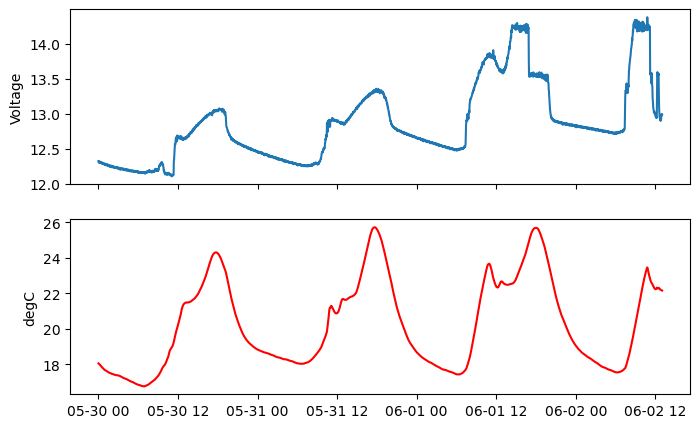

In [47]:
df_list = [] # init empty dataframe 

for x in batpanel:
    loop = pd.read_csv(x,sep=',',names=['time','record','BattV','PTemp'],header=3,parse_dates=[0]) 
    df_list.append(loop)

dl = pd.concat(df_list,ignore_index=True)   # dl for datalogger sensor values 
dl = dl.set_index('time')                   # set the time column to be the index
dl = dl.loc['2023-05-30':'2023-06-03']      # slicing dates I want

fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(8,5),sharex=ax[0])

ax[0].plot(dl.index,dl.BattV,label='Battery Voltage')
ax[0].set_ylabel('Voltage')
ax[1].plot(dl.index,dl.PTemp,label='Panel Temp',color='red')
ax[1].set_ylabel('degC')

# fig,ax=plt.subplots(figsize=(8,5))
# ax.plot(dl.index,dl.BattV,label='Battery Voltage')
# ax.set_ylabel('Voltage')
# ax2=ax.twinx()
# ax2.plot(dl.index,dl.PTemp,label='Panel Temp',color='red')
# ax2.set_ylabel('degC')
# ax.legend()
# ax2.legend()